#### **Ejercicio:** ¿Qué algoritmo de Agrupamiento es mejor?

**Elaborado por:** Fabian Villarreal Sosa

**Tarea**

Tu tarea es construir a partir de tu trabajo de segmentación de clientes utilizando KMeans de antes en este capítulo. Ahora, queremos usar métodos de agrupamiento adicionales y seleccionar el mejor algoritmo de agrupamiento para esta tarea. Realiza la segmentación de clientes mediante KMeans, agrupación jerárquica en clústeres y DBSCAN. Nos interesa agrupar a nuestros clientes en grupos basados en características similares. Esto puede ayudar a la empresa a asignar recursos de marketing de forma eficaz. Usaremos la edad del cliente, la educación, los años de empleo, los ingresos, la deuda, si incumplieron y la relación deuda: ingresos para agruparlos en segmentos. Puedes descargar los datos aquí. La fuente original proviene de esta fuente.

https://github.com/Nikhil-Adithyan/Customer-Segmentation-with-K-Means

**Parte 1**

Utiliza KMeans, agrupación jerárquica, y DBSCAN para crear varios segmentos de clientes. Asegúrate de poder hacer una copia de seguridad del número de clústeres que elijas para los algoritmos que seleccionen el número de clústeres.

**Parte 2**

¿Qué algoritmo de agrupación en clústeres es mejor para estos datos y por qué?

In [59]:
# Librerias
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

from google.colab import drive

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

In [60]:
# Acceder a directorio en Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
# Determinar directorio
os.chdir('/content/drive/MyDrive/Coding Dojo/Datos')
os.getcwd()

'/content/drive/MyDrive/Coding Dojo/Datos'

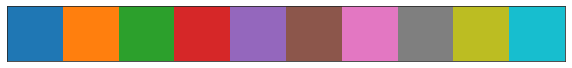

In [62]:
# Estilo de graficos
sns.set_style('white')
csfont = {'fontname':'Calibri'} # Fuente a utilizar

# Paleta de colores
# my_palette = ['#4472C4', '#ED7D31', '#A5A5A5', '#FFC000', '#5B9BD5', '#70AD47', '#264478', '#9E480E', '#636363', '#997300'] # Excel color palette
my_palette2 = sns.color_palette('tab10', 10)
sns.palplot(sns.color_palette(my_palette2, 10))

# Define palette
sns.set_palette(my_palette2)

In [63]:
# Datos
df = pd.read_csv('cust_seg.csv')
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [64]:
# Columnas con valores perdidos
cols_nans = df.columns[df.isna().any()]
cols_nans

Index(['Defaulted'], dtype='object')

In [65]:
# Cantidad de valores perdidos
df[cols_nans].isna().sum()

Defaulted    150
dtype: int64

In [66]:
# Ver estadistica descriptiva de variables de acuerdo a 'Defaulted'
df.groupby(['Defaulted']).agg({'Income': ['mean', 'min', 'max'],
                               'Card Debt': ['mean', 'min', 'max'],
                               'Other Debt': ['mean', 'min', 'max'],
                               'DebtIncomeRatio': ['mean', 'min', 'max']})

Income          Card Debt  ... Other Debt DebtIncomeRatio           
                mean min  max      mean  ...        max            mean  min   max
Defaulted                                ...                                      
0.0        47.154739  14  253  1.245513  ...     18.269        8.679304  0.4  32.5
1.0        41.213115  14  446  2.423858  ...     27.034       14.727869  0.9  41.3

[2 rows x 12 columns]

In [67]:
# Proporcion de clientes por 'Defaulted'
round(df['Defaulted'].value_counts()/df.shape[0] * 100, 2)

# La mayoria no ha caido en default

0.0    60.82
1.0    21.53
Name: Defaulted, dtype: float64

In [68]:
# Eliminar observaciones que poseen datos perdidos en la variable 'Defaulted'
df = df[df['Defaulted'].notna()]

In [69]:
# Variables de interes
X_var = df.drop(['Customer Id'], axis = 1).columns
X = df.loc[:, X_var]

In [70]:
# Escalar los datos
scaler = StandardScaler()
# Ajustar con base en el conjunto de datos
X = scaler.fit_transform(X)

**Función para estimar el modelo y mostrar el coeficiente de silueta**

In [71]:
def cluster(model, X_scaled, method):
  # Seed
  np.random.seed(2731)
  # Estimacion
  model.fit(X_scaled)
  # Numero de clusters
  clusters = model.labels_
  num_clusters = len(set(clusters[clusters >= 0]))
  # Coeficiente de silueta
  silh_score = silhouette_score(X_scaled, model.labels_)

  # Results
  print(f'\nModel Report\n{method}\n')
  print(f'Number of clusters: {num_clusters}\n')
  print(f'Silhouette Coefficient: {silh_score:.3f}')

**Coeficientes de silueta para diferentes numeros de clusters**

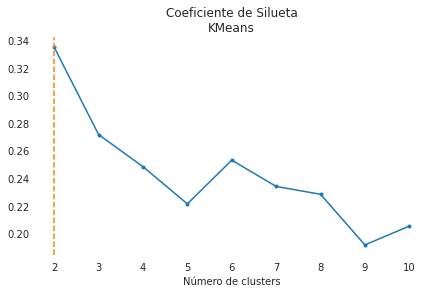

In [72]:
# KMeans

np.random.seed(2731)
silhouette_scores_kmeans = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i, random_state = 2731)
  kmeans.fit(X)
  silhouette_scores_kmeans.append(silhouette_score(X, kmeans.labels_))

# Grafico
plt.plot(range(2, 11), silhouette_scores_kmeans, marker = '.')
plt.axvline(x = 2, color = my_palette2[1], linestyle = '--')
plt.title('Coeficiente de Silueta\nKMeans')
plt.ylabel('')
plt.xlabel('Número de clusters')
plt.xticks(range(2, 11))
sns.despine(left = True, bottom = True)
plt.gcf().set_size_inches(7, 4);

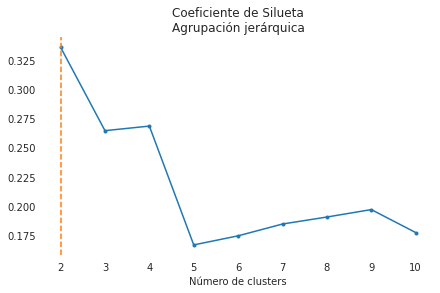

In [73]:
# Hierarchical clustering

np.random.seed(2731)
silhouette_scores_hc = []
for i in range(2, 11):
  hc = AgglomerativeClustering(n_clusters = i)
  hc.fit(X)
  silhouette_scores_hc.append(silhouette_score(X, hc.labels_))

# Grafico
plt.plot(range(2, 11), silhouette_scores_hc, marker = '.')
plt.axvline(x = 2, color = my_palette2[1], linestyle = '--')
plt.title('Coeficiente de Silueta\nAgrupación jerárquica')
plt.ylabel('')
plt.xlabel('Número de clusters')
plt.xticks(range(2, 11))
sns.despine(left = True, bottom = True)
plt.gcf().set_size_inches(7, 4);

In [74]:
# Tanto para el clustering por KMeans como por agrupación jerárquica se sugieren dos clusters.
n_opt = 2

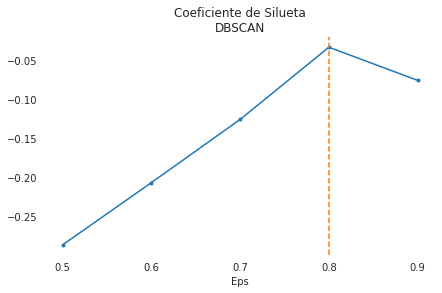

In [75]:
# DBSCAN

np.random.seed(2731)
silhouette_scores_dbs = []
for i in np.arange(0.5, 1.0, 0.1):
  dbs = DBSCAN(eps = i, min_samples = 5)
  dbs.fit(X)
  silhouette_scores_dbs.append(silhouette_score(X, dbs.labels_))

# Grafico
plt.plot(np.arange(0.5, 1.0, 0.1), silhouette_scores_dbs, marker = '.')
plt.axvline(x = 0.8, color = my_palette2[1], linestyle = '--')
plt.title('Coeficiente de Silueta\nDBSCAN')
plt.ylabel('')
plt.xlabel('Eps')
plt.xticks(np.arange(0.5, 1.0, 0.1))
sns.despine(left = True, bottom = True)
plt.gcf().set_size_inches(7, 4);

**KMeans**

In [76]:
# Modelo y estimacion
kmeans = KMeans(n_clusters = n_opt, random_state = 2731)
cluster(kmeans, X, 'KMeans')


Model Report
KMeans

Number of clusters: 2

Silhouette Coefficient: 0.335


**Agrupación jerárquica**

In [77]:
# Modelo y estimacion
hc = AgglomerativeClustering(n_clusters = n_opt)
cluster(hc, X, 'Agrupación jerárquica')


Model Report
Agrupación jerárquica

Number of clusters: 2

Silhouette Coefficient: 0.336


**DBSCAN**

In [78]:
# Modelo y estimacion
dbs = DBSCAN(eps = 0.8, min_samples = 5)
cluster(dbs, X, 'DBSCAN')


Model Report
DBSCAN

Number of clusters: 6

Silhouette Coefficient: -0.034


In [79]:
# Con base en el coeficiente de silueta, los resultados sugieren que se debe optar por la 
# agrupación jerárquica con dos clusters.
# Es decir, los resultados sugieren que, los clientes pueden ser segmentados en dos tipos.